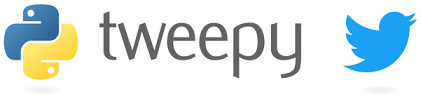

## Ejercicio - Análisis de Twitter con Tweepy y TexBlob

Cargaremos un archivo de texto llamado **segunda_vuelta.csv** conteniendo tweets que resultaron de la busqueada con el hashtag **#fraudeenmesa** del 8 al 14 de junio del 2021.

Realizar las operaciones que se solicitan.

**Nota:** Mayor info sobre el diccionario de datos del objeto "tweet" se describe en: https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet

### 1. Importación de librerias

In [9]:
import pandas as pd
import numpy as np
import csv
import os
import tweepy
from tweepy import OAuthHandler
from credenciales import *

def twitter_setup():
    """
    Esta funcion permite configurar el API de Twitter 
    con nuestras credenciales como developer
    """
    # Autenticacion y acceso utilizando las claves:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Devolver API con autenticación
    api = tweepy.API(auth)
    return api

### 2. Carga de Tweets

**(a) Cargamos los tweets contenidos en **segunda_vuelta.csv** en un dataframe llamado data**

In [12]:
data = pd.read_csv("segunda_vuelta.csv")

### 3. Análisis de datos

**(b) Observamos las 10 primeras observaciones de data**

In [13]:
display(data.head(10))

,created_at,text,likes,RTs,user_name
0,13/06/2021 23:59,@MarthaChavezC @ONPE_oficial Estas elecciones ...,7.0,3.0,la_charapita
1,13/06/2021 23:58,@DavidU1924 @MarthaChavezC ¡Cuantas actas mas ...,12.0,0.0,DPostigo50
2,13/06/2021 23:54,@ONPE_oficial @alecosta @kennethsanchezg La @O...,1.0,0.0,AleGayoso2
3,13/06/2021 23:46,@JNE_Peru @tuesta @fidh_es PERDIERON CREDIBILI...,0.0,0.0,E062020
4,13/06/2021 23:45,@susanaabad @MarleneChG1 Con el #FraudeEnMesa,0.0,0.0,HILARYCAMPOVER2
5,13/06/2021 23:44,@IndiraHuilca Yo no vi a nadie destilar odio e...,0.0,0.0,TheRealGuille82
6,13/06/2021 23:41,@Tgiusseppe @ONPE_oficial @KeikoFujimori Segur...,1.0,1.0,NANKARINA5
7,13/06/2021 23:39,#fraudeEnMesa una más de las miles fraudulenta...,2.0,1.0,yzarich
8,13/06/2021 23:37,@amariateguibnof Ya es el colmo el pulpo que h...,8.0,4.0,Juaniperezc
9,13/06/2021 23:37,@America24Horas @KeikoFujimori Han anulado act...,0.0,0.0,GabrielOmarPM


,created_at,text,likes,RTs,user_name
0,13/06/2021 23:59,@MarthaChavezC @ONPE_oficial Estas elecciones ...,7.0,3.0,la_charapita
1,13/06/2021 23:58,@DavidU1924 @MarthaChavezC ¡Cuantas actas mas ...,12.0,0.0,DPostigo50
2,13/06/2021 23:54,@ONPE_oficial @alecosta @kennethsanchezg La @O...,1.0,0.0,AleGayoso2
3,13/06/2021 23:46,@JNE_Peru @tuesta @fidh_es PERDIERON CREDIBILI...,0.0,0.0,E062020
4,13/06/2021 23:45,@susanaabad @MarleneChG1 Con el #FraudeEnMesa,0.0,0.0,HILARYCAMPOVER2
5,13/06/2021 23:44,@IndiraHuilca Yo no vi a nadie destilar odio e...,0.0,0.0,TheRealGuille82
6,13/06/2021 23:41,@Tgiusseppe @ONPE_oficial @KeikoFujimori Segur...,1.0,1.0,NANKARINA5
7,13/06/2021 23:39,#fraudeEnMesa una más de las miles fraudulenta...,2.0,1.0,yzarich
8,13/06/2021 23:37,@amariateguibnof Ya es el colmo el pulpo que h...,8.0,4.0,Juaniperezc
9,13/06/2021 23:37,@America24Horas @KeikoFujimori Han anulado act...,0.0,0.0,GabrielOmarPM


**(c) Cuantas observaciones tiene el dataframe llamado data?**

In [14]:
len(data)

17839

17839

**(d)Que info tiene el conjuno de datos?**

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17839 entries, 0 to 17838
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  17838 non-null  object 
 1   text        17839 non-null  object 
 2   likes       17838 non-null  float64
 3   RTs         17838 non-null  float64
 4   user_name   17839 non-null  object 
dtypes: float64(2), object(3)
memory usage: 697.0+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17839 entries, 0 to 17838
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  17838 non-null  object 
 1   text        17839 non-null  object 
 2   likes       17838 non-null  float64
 3   RTs         17838 non-null  float64
 4   user_name   17839 non-null  object 
dtypes: float64(2), object(3)
memory usage: 697.0+ KB


**(e) Cual es el promedio de likes?** 

In [16]:
data['likes'].mean()

12.089527973988115

Promedio de likes: 12.09 



**(f) Cual es el promedio de retweets?** 

In [17]:
data['RTs'].mean()

4.876219307097208

Promedio de RTs: 4.88 



**(g) Cual es el tweet con más likes y cual el que tiene más retweets?**

In [76]:
print("Tweet con mas likes: " + str(data['likes'].max()) + " likes")
print(data[data['likes'] == data['likes'].max()]['user_name'])
print(data[data['likes'] == data['likes'].max()]['text'])
data.loc[12505]

Tweet con mas likes: 5399.0 likes
12505    patriciagamarra
Name: user_name, dtype: object
12505    Sí. Perdí las elecciones. Pero saben qué? Lo a...
Name: text, dtype: object


created_at                                     09/06/2021 14:32
text          Sí. Perdí las elecciones. Pero saben qué? Lo a...
likes                                                      5399
RTs                                                         418
user_name                                       patriciagamarra
Name: 12505, dtype: object

In [84]:
print("Tweet con mas retweets: " + str(data['RTs'].max()) + " retweets")
print(data[data['RTs'] == data['RTs'].max()]['user_name'])
print(data[data['RTs'] == data['RTs'].max()]['text'])

Tweet con mas retweets: 1925.0 retweets
12490    JulianMaciasT
Name: user_name, dtype: object
12490    Keiko y su pack completo trumpista/Atlas Netwo...
Name: text, dtype: object


Tweet con mas retweets:  1925.0  retweets
Indice del Tweet con mas RTs:  12490
Usuario:  JulianMaciasT
Keiko y su pack completo trumpista/Atlas Network: Amenaza de golpe, acusaciones de fraude sin prueba, campaña de od… https://t.co/XbyJsKT1Xn


### 4. Visualizaciones

**(a) Crea una serie de tiempo para las columnas 'likes' y "RTs" por separado**

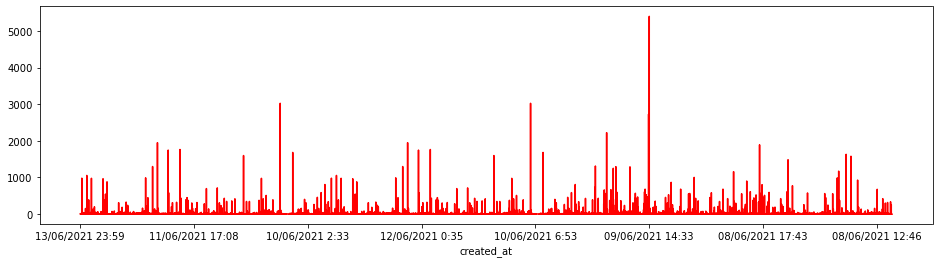

In [58]:
tfav = pd.Series(data=data['likes'].values, index=data['created_at'])
tret = pd.Series(data=data['RTs'].values, index=data['created_at'])

tfav.plot(figsize=(16,4), color='r');

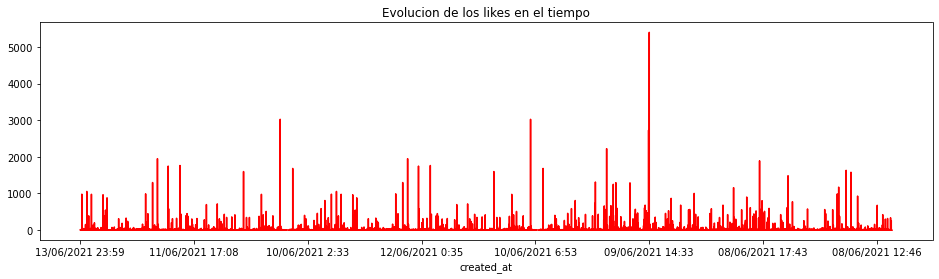

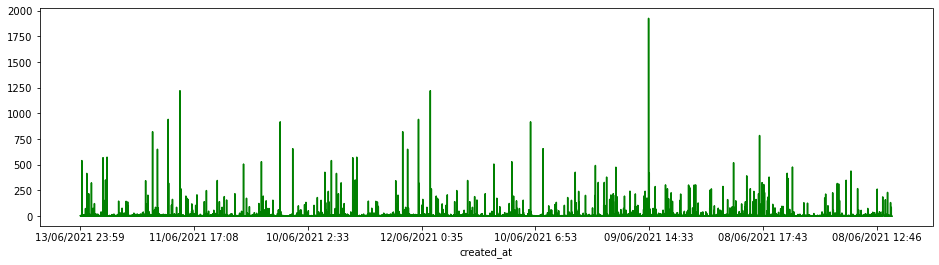

In [59]:
tret.plot(figsize=(16,4), color='g');

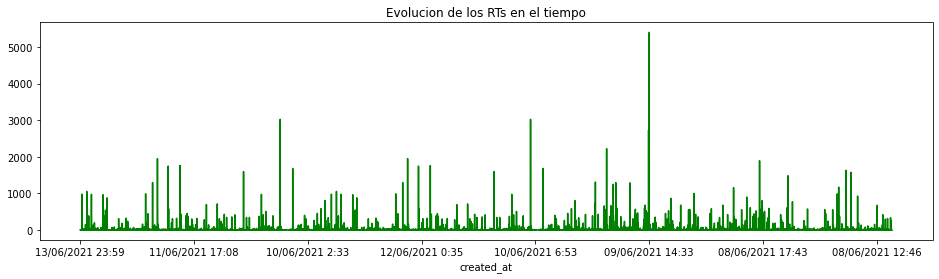

**(b) Crea una serie de tiempo para las columnas 'likes' y "RTs" juntos en el mismo grafico**

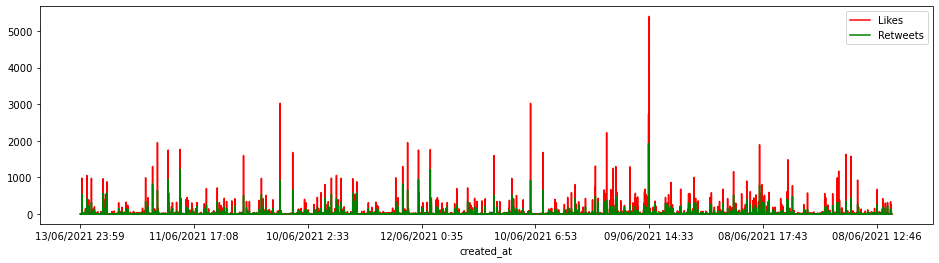

In [61]:
tfav.plot(figsize=(16,4), color='r', label="Likes", legend=True)
tret.plot(figsize=(16,4), color='g', label="Retweets", legend=True);

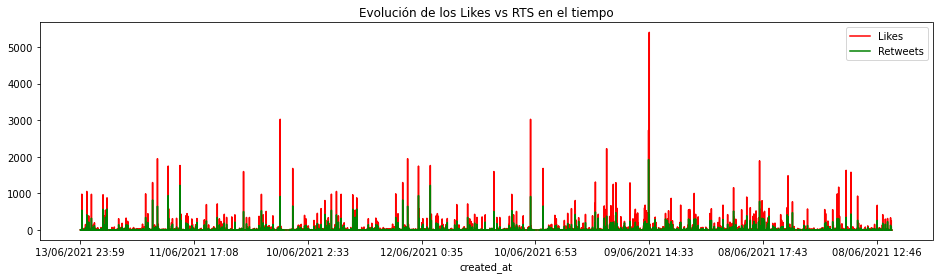

### 5. Análisis de Sentimientos

In [62]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Función de utilidad para limpiar el texto de un tweet eliminando
     enlaces y caracteres especiales que utilizan expresiones regulares.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Función de utilidad para clasificar la polaridad de un tweet
     usando textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

**(a) Crea una nueva columna llamada SA (Sentimental Analysis) en el dataframe data y asignale un valor de polaridad utilizando la funcion analize_sentiment()**

In [107]:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['text'] ])
data.head(10)

,created_at,text,likes,RTs,user_name,SA
0,13/06/2021 23:59,@MarthaChavezC @ONPE_oficial Estas elecciones ...,7.0,3.0,la_charapita,0
1,13/06/2021 23:58,@DavidU1924 @MarthaChavezC ¡Cuantas actas mas ...,12.0,0.0,DPostigo50,0
2,13/06/2021 23:54,@ONPE_oficial @alecosta @kennethsanchezg La @O...,1.0,0.0,AleGayoso2,0
3,13/06/2021 23:46,@JNE_Peru @tuesta @fidh_es PERDIERON CREDIBILI...,0.0,0.0,E062020,0
4,13/06/2021 23:45,@susanaabad @MarleneChG1 Con el #FraudeEnMesa,0.0,0.0,HILARYCAMPOVER2,0
5,13/06/2021 23:44,@IndiraHuilca Yo no vi a nadie destilar odio e...,0.0,0.0,TheRealGuille82,0
6,13/06/2021 23:41,@Tgiusseppe @ONPE_oficial @KeikoFujimori Segur...,1.0,1.0,NANKARINA5,0
7,13/06/2021 23:39,#fraudeEnMesa una más de las miles fraudulenta...,2.0,1.0,yzarich,0
8,13/06/2021 23:37,@amariateguibnof Ya es el colmo el pulpo que h...,8.0,4.0,Juaniperezc,0
9,13/06/2021 23:37,@America24Horas @KeikoFujimori Han anulado act...,0.0,0.0,GabrielOmarPM,0


,created_at,text,likes,RTs,user_name,SA
0,13/06/2021 23:59,@MarthaChavezC @ONPE_oficial Estas elecciones ...,7.0,3.0,la_charapita,0
1,13/06/2021 23:58,@DavidU1924 @MarthaChavezC ¡Cuantas actas mas ...,12.0,0.0,DPostigo50,0
2,13/06/2021 23:54,@ONPE_oficial @alecosta @kennethsanchezg La @O...,1.0,0.0,AleGayoso2,0
3,13/06/2021 23:46,@JNE_Peru @tuesta @fidh_es PERDIERON CREDIBILI...,0.0,0.0,E062020,0
4,13/06/2021 23:45,@susanaabad @MarleneChG1 Con el #FraudeEnMesa,0.0,0.0,HILARYCAMPOVER2,0
5,13/06/2021 23:44,@IndiraHuilca Yo no vi a nadie destilar odio e...,0.0,0.0,TheRealGuille82,0
6,13/06/2021 23:41,@Tgiusseppe @ONPE_oficial @KeikoFujimori Segur...,1.0,1.0,NANKARINA5,0
7,13/06/2021 23:39,#fraudeEnMesa una más de las miles fraudulenta...,2.0,1.0,yzarich,0
8,13/06/2021 23:37,@amariateguibnof Ya es el colmo el pulpo que h...,8.0,4.0,Juaniperezc,0
9,13/06/2021 23:37,@America24Horas @KeikoFujimori Han anulado act...,0.0,0.0,GabrielOmarPM,0


**(b) Obten la cantidad total de tweets positivos, neutrales y negativos**

In [108]:
pos_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] < 0]

print("Cantidad de tweets positivos: {}".format(len(pos_tweets)))
print("Cantidad de tweets neutrales: {}".format(len(neu_tweets)))
print("Cantidad de tweets negativos: {}".format(len(neg_tweets)))

Cantidad de tweets positivos: 476
Cantidad de tweets neutrales: 17164
Cantidad de tweets negativos: 199


Cantidad de tweets positivos :  476
Cantidad de tweets neutrales:  17164
Cantidad de tweets negativos:  199


**(c) Obten el % de tweets positivos, neutrales y negativos**

In [109]:
print("Percentaje de positivos tweets: {}%".format(len(pos_tweets)*100/len(data['text'])))
print("Percentaje de neutrales tweets: {}%".format(len(neu_tweets)*100/len(data['text'])))
print("Percentaje de negativos tweets: {}%".format(len(neg_tweets)*100/len(data['text'])))

Percentaje de positivos tweets: 2.6683110039800435%
Percentaje de neutrales tweets: 96.21615561410393%
Percentaje de negativos tweets: 1.1155333819160267%


Percentaje de tweets positivos : 2.6683110039800435%
Percentaje de tweets neutrales: 96.21615561410393%
Percentaje de tweets negativos: 1.1155333819160267%


Que opinas de los RESULTADOS obtenidos?  LOS PERUANOS SOMOS NEUTRALES?

## Buen trabajo!